# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otocznia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3.Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

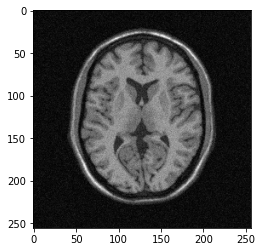

In [2]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import loadmat
import math

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/'

fileNames = ["MR_data.mat"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

mat = loadmat("MR_data.mat")
img = mat['I_noisy1']
plt.imshow(mat['I_noisy1'], 'gray')

all_images = [mat['I_noisefree'],mat['I_noisy1'], mat['I_noisy2'], mat['I_noisy3'],mat['I_noisy4']]


### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

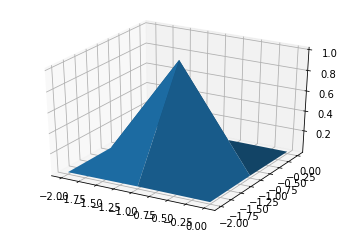

In [72]:
#TODO Samodzielna
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()


mesh(fgaussian(3,0.3), 3)

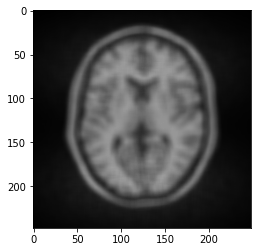

In [43]:
size = 9
sigma = 16
border = int(np.floor(size/2))
shape_shorter = size-1

IConv_img = all_images[2].copy()

def convolution(img_to_convert):
  result_shape_x, result_shape_y = img_to_convert.shape
  result = np.zeros((result_shape_x-(shape_shorter),result_shape_y-(shape_shorter)))
  for i in range(border,result_shape_y-border):
    for j in  range(border,result_shape_x-border):
      window = img_to_convert[max(j-border,0):min(j+border+1, result_shape_x),max(i-border,0):min(i+border+1, result_shape_y)]
      result [j-border,i-border]=new_value_of_pixel(window , fgaussian(size,sigma))
      
  return result

def new_value_of_pixel(window, factors):
    return np.array([window[x,y]*factors[x,y] for y in range(0, size) for x in range(0, size)]).sum()/factos.sum()

new_img = convolution(IConv_img)

plt.imshow(new_img, 'gray', vmin=0, vmax=255)

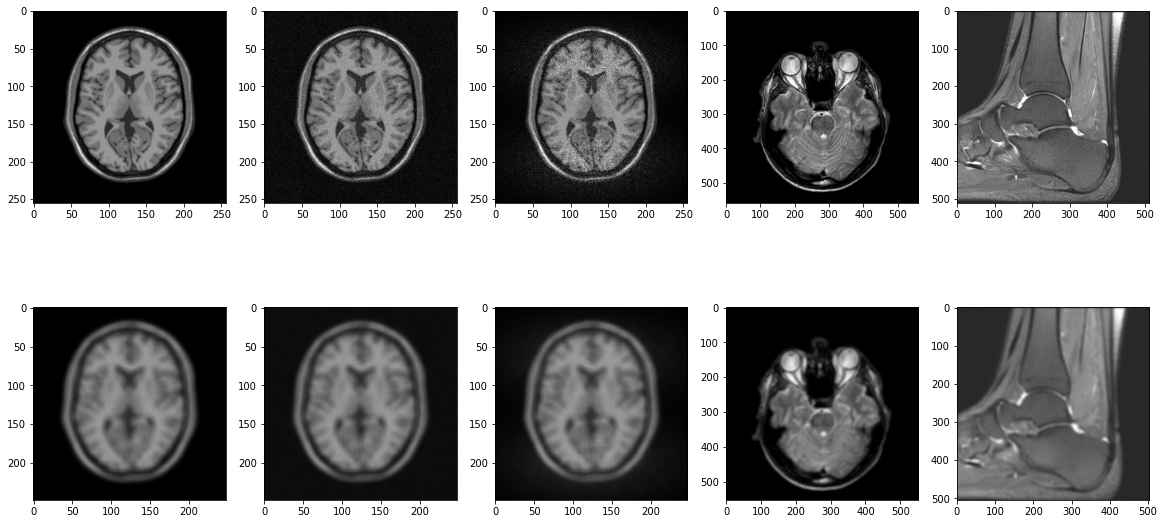

In [44]:
pl, ax = plt.subplots(2,5)
pl.set_size_inches(20, 10)
for x in range(0,5):
  img = convolution(all_images[x].copy())
  ax[0, x].imshow(all_images[x], 'gray', vmin=0, vmax=255)
  ax[1, x].imshow(img, 'gray', vmin=0, vmax=255)

### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gausowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

In [100]:
size = 15
sigma = 0.8
gamma = 16
border = int(np.floor(size/2))
shape_shorter = size-1

IBilateral = img.copy()

def convolution_bil(img_to_convert):
  result_shape_x, result_shape_y = img_to_convert.shape
  result = np.zeros((result_shape_x-(shape_shorter),result_shape_y-(shape_shorter)))
  for i in range(border,result_shape_y-border):
    for j in  range(border,result_shape_x-border):
      window = img_to_convert[max(j-border,0):min(j+border+1, result_shape_x),max(i-border,0):min(i+border+1, result_shape_y)]
      result [j-border,i-border]=new_value_of_pixel(window , fgaussian(size,sigma), gamma)
  
  # result = cv2.normalize(result, None, 0, 256, cv2.NORM_MINMAX)
  return result

def new_value_of_pixel(window, factors, gamma):
    
    colors_counterdomain = np.array([[np.exp(-(np.abs(window[int(size-border-1),int(size-border-1)]-window[x,y]))/(2*(gamma**2))) for x in range(0, size)] for y in range(0, size)])
    ## do poprawy normalizacja
    b = np.array([[(factors[x,y]*colors_counterdomain[x,y]) for x in range(0, size)] for y in range(0, size)])
    
    return np.array([window[x,y]*b[x,y] for x in range(0, size) for y in range(0, size)]).sum()/(b.sum())


<ipython-input-100-1828924cfca1>:22: RuntimeWarning: overflow encountered in ubyte_scalars
  colors_counterdomain = np.array([[np.exp(-(np.abs(window[int(size-border-1),int(size-border-1)]-window[x,y]))/(2*(gamma**2))) for x in range(0, size)] for y in range(0, size)])


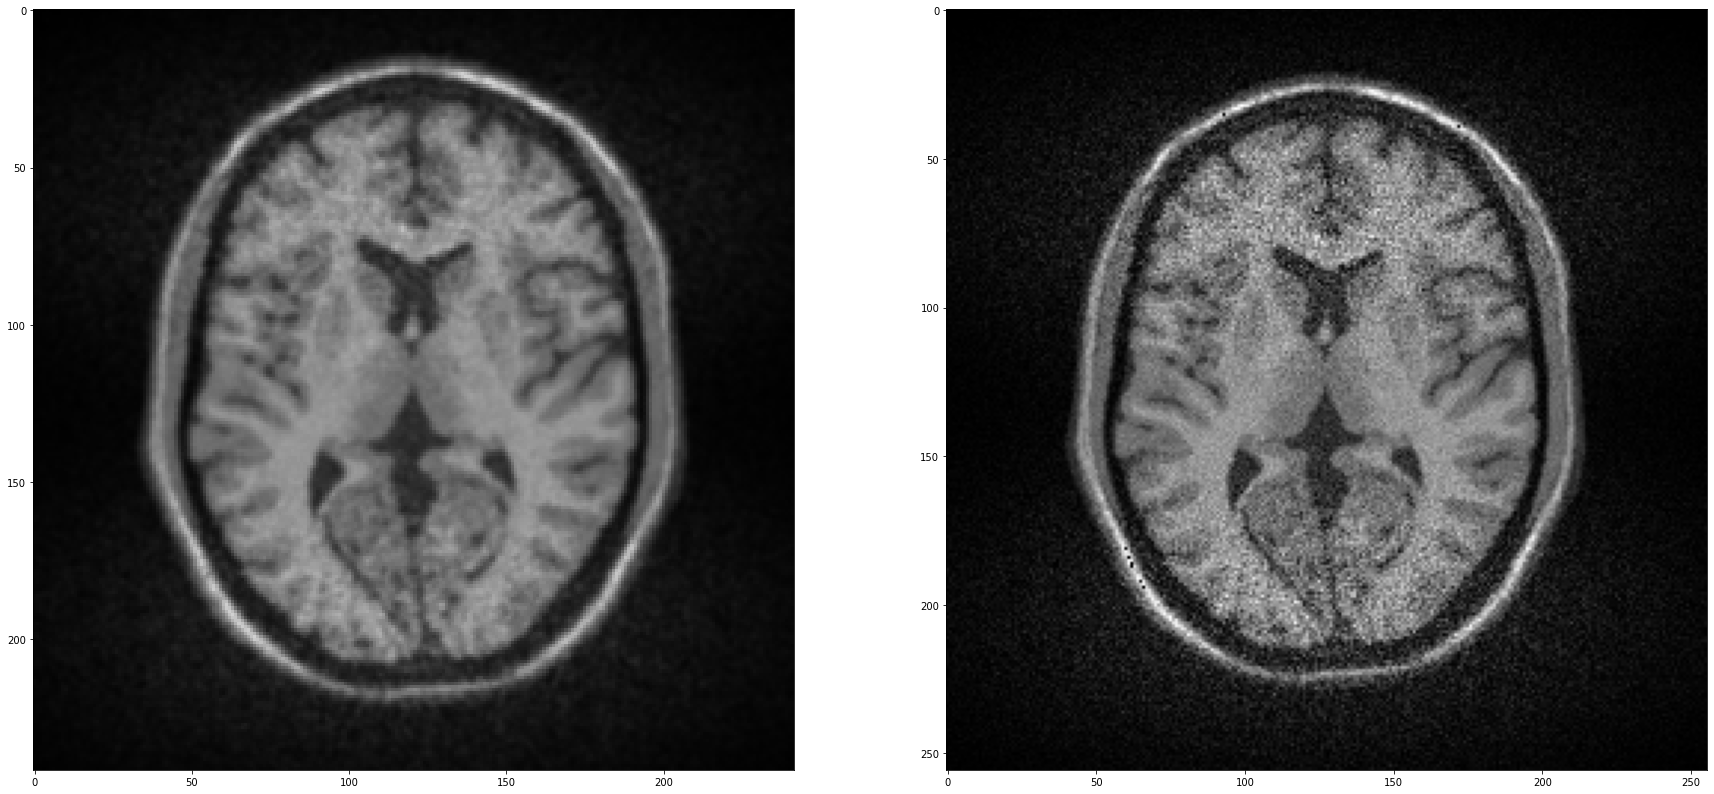

In [101]:
pl, ax = plt.subplots(1,2)
pl.set_size_inches(30, 15)
img_copy = all_images[2].copy()
img = convolution_bil(img_copy)
ax[0].imshow(img, 'gray', vmin=0, vmax=255)
ax[1].imshow(all_images[2], 'gray', vmin=0, vmax=255)

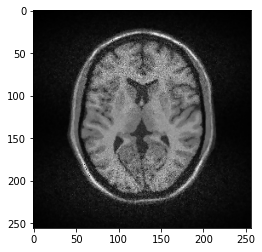

In [103]:
new_img = np.zeros(all_images[2].shape)
all_images[2] = np.uint8(all_images[2])
new_img = cv2.bilateralFilter(all_images[2], 15 , 16 , 0.8)
plt.imshow(new_img, 'gray', vmin=0, vmax=255)

In [75]:
print(all_images[2])

[[0.23024738 0.327835   0.2997183  ... 0.06680514 0.10873854 0.11384532]
 [0.25126615 0.69532601 0.43822142 ... 0.14616315 0.2257041  0.27381832]
 [0.28232529 0.68487567 0.70431929 ... 0.2900116  0.23020385 0.20468346]
 ...
 [0.88003064 1.41342665 1.54859984 ... 3.06947496 1.91736136 3.0354103 ]
 [1.32773306 3.07640475 3.96538822 ... 1.17734149 1.34515524 1.53685186]
 [1.66744606 3.23984379 1.6496464  ... 1.27345289 2.40152488 0.84124541]]
